# Titanic (Machine Learning from Disaster) - Análise Exploratória dos Dados
## Contexto

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patches as mpatches


from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap


color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

# Definir cores
color_binary = {
    0: color_palette21[-7],  # Vermelho para não sobreviveu
    1: color_palette21[3]   # Azul para sobreviveu
}

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)


[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---
## 2. Dataload & Pré-visualização dos Dados 🗂️

In [2]:
# Carregando os dados
dfo = pd.read_csv("/home/akel/PycharmProjects/Kaggle/Titanic/data/raw/train.csv")
df=dfo.drop(columns='PassengerId')
NC=df.shape[1]
inital_describe(df,True)
df.describe()

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 891 linhas
   • 11 colunas
   • Total de células: 9801

🔧 TIPOS DE DADOS:
   • object: 5 colunas
   • int64: 4 colunas
   • float64: 2 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 866
   • Percentual: 8.84%

📊 COLUNAS COM VALORES NULOS:
   • Age: 177 nulos (19.87%)
   • Cabin: 687 nulos (77.10%)
   • Embarked: 2 nulos (0.22%)

✅ ANÁLISE CONCLUÍDA


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


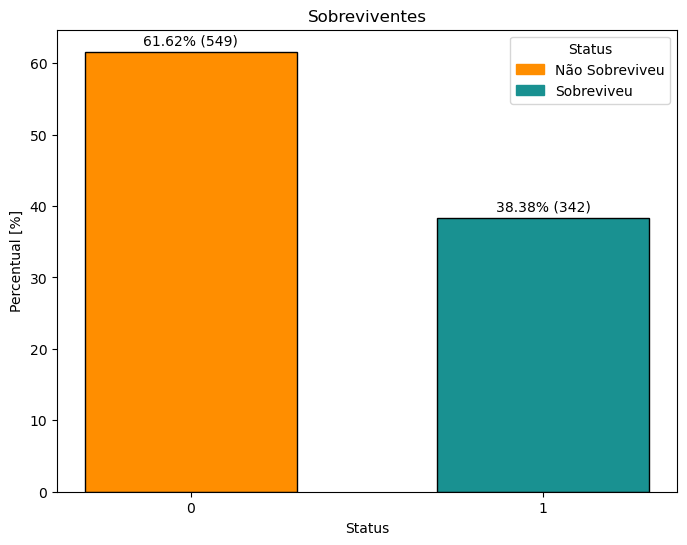

In [3]:

# Calcular contagens/percentual
contagens = df['Survived'].value_counts()
percentuais = df['Survived'].value_counts(normalize=True) * 100

# DataFrame
dfa = pd.DataFrame({
    'Sobreviveu': contagens.index,
    'Total': contagens.values,
    'Percentual': percentuais.values})
 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))  # 2 linhas, 2 colunas

ax.bar(dfa.index, dfa['Percentual'], color=list(color_binary.values()), edgecolor='black', width=0.6)
ax.set_xlabel('Status')
ax.set_xticks([0, 1])
ax.set_ylabel('Percentual [%]')


ax.set_title('Sobreviventes')
for i in range(2):
     ax.text(i, 0.5 + dfa['Percentual'].values[i] , f'{dfa["Percentual"][i]:.2f}% ({dfa["Total"][i]})',
             ha='center', va='bottom', fontsize=10)

# Legend
legend_elements = [
    mpatches.Patch(color=color_palette21[-7], label='Não Sobreviveu'),
    mpatches.Patch(color=color_palette21[3], label='Sobreviveu')]
ax.legend(handles=legend_elements, title='Status')
plt.show()
plt.show()


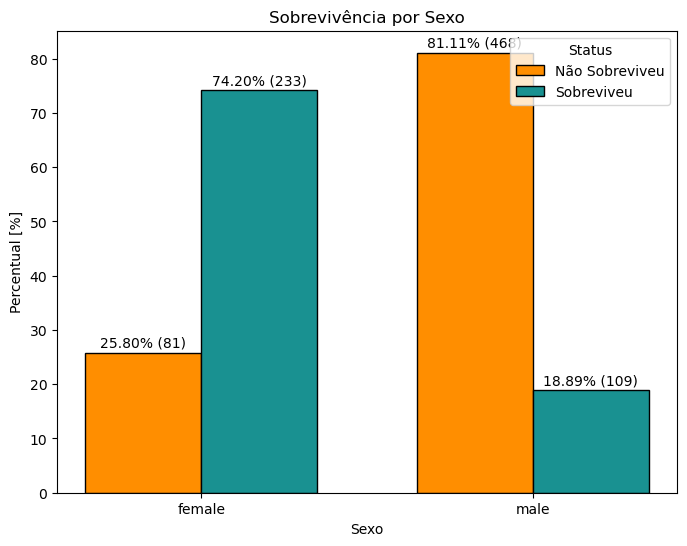

,Sex,Survived,Count,Percent
0,female,0,81,25.796178
1,female,1,233,74.203822
2,male,0,468,81.109185
3,male,1,109,18.890815


In [4]:
# tabela
contagem = pd.crosstab(df['Sex'], df['Survived'])
percentuais = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['Sex'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

features = df_s['Sex'].unique()
x = np.arange(len(features))
width = 0.35

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=10
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('Sexo')
ax.set_title('Sobrevivência por Sexo')
ax.legend(title='Status')

plt.show()


df_s


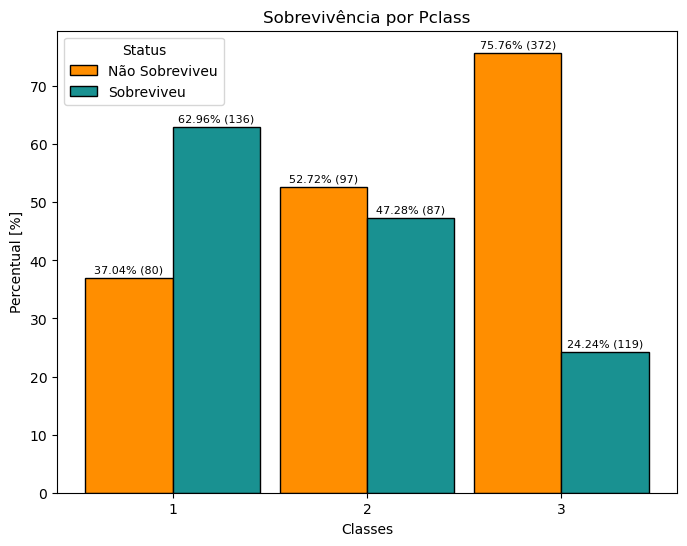

In [5]:
# tabela
contagem = pd.crosstab(df['Pclass'], df['Survived'])
percentuais = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['Pclass'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

features = df_s['Pclass'].unique()
x = np.arange(len(features))
width = 0.45

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=8
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('Classes')
ax.set_title('Sobrevivência por Pclass')
ax.legend(title='Status')

plt.show()


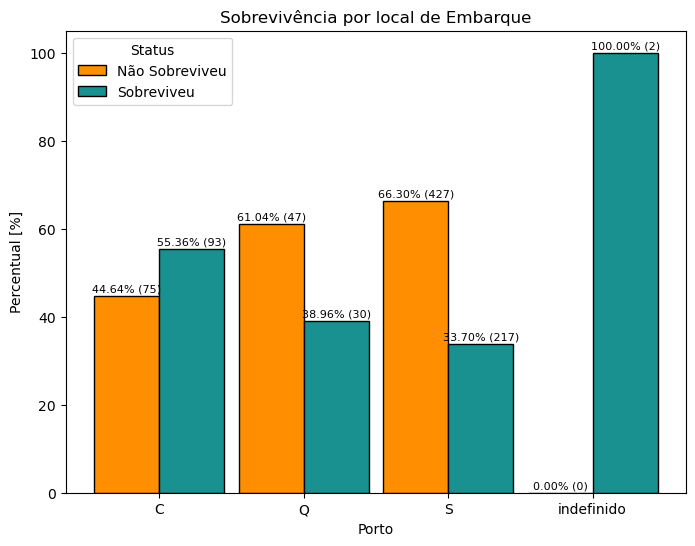

In [24]:
# tabela
df['Embarked'] = df['Embarked'].fillna('indefinido')

contagem = pd.crosstab(df['Embarked'], df['Survived'])
percentuais = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['Embarked'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

features = df_s['Embarked'].unique()
x = np.arange(len(features))
width = 0.45

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=8
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('Porto')
ax.set_title('Sobrevivência por local de Embarque')
ax.legend(title='Status')

plt.show()

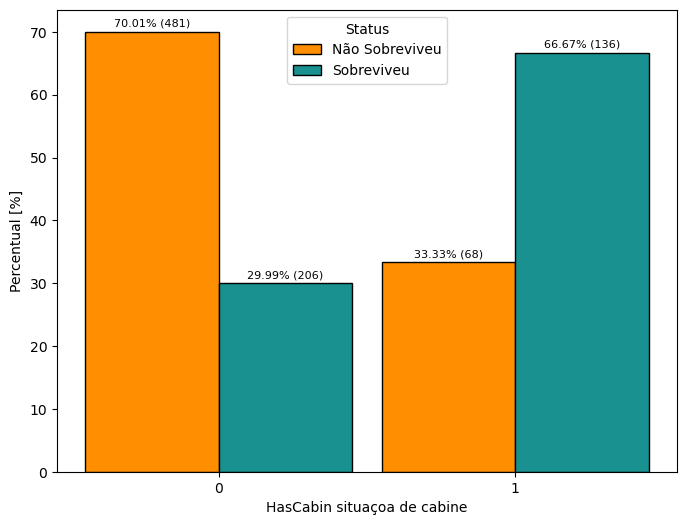

In [7]:
# tabela
df['HasCabin'] = df['Cabin'].notnull().astype(int)

contagem = pd.crosstab(df['HasCabin'], df['Survived'])
percentuais = pd.crosstab(df['HasCabin'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['HasCabin'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

features = df_s['HasCabin'].unique()
x = np.arange(len(features))
width = 0.45

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=8
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('HasCabin situaçoa de cabine')
ax.legend(title='Status')

plt.show()

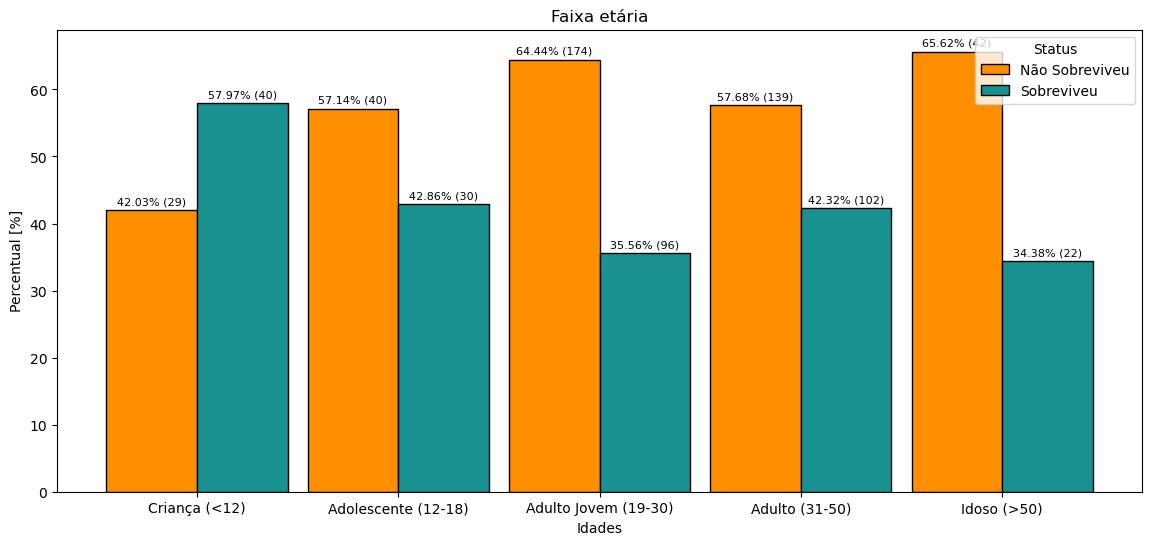

In [8]:
# Criar bins de idade
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], 
                         labels=['Criança (<12)', 'Adolescente (12-18)', 
                                 'Adulto Jovem (19-30)', 'Adulto (31-50)', 
                                 'Idoso (>50)'])


# tabela
contagem = pd.crosstab(df['Age_Group'], df['Survived'])
percentuais = pd.crosstab(df['Age_Group'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['Age_Group'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(14, 6))

features = df_s['Age_Group'].unique()
x = np.arange(len(features))
width = 0.45

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=8
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('Idades')
ax.set_title('Faixa etária')
ax.legend(title='Status')

plt.show()

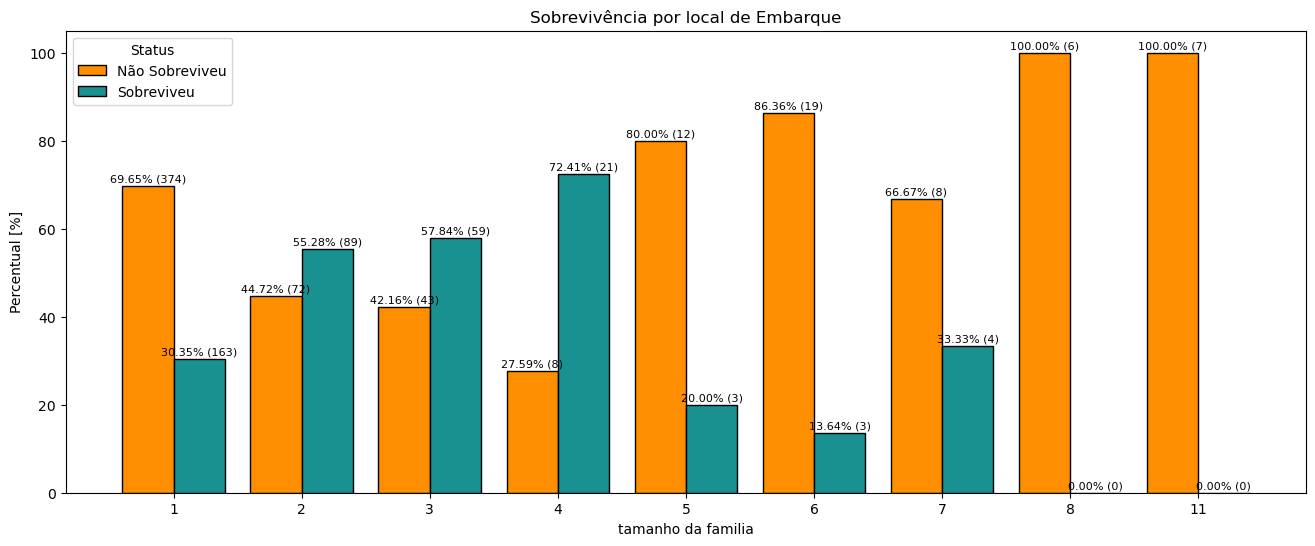

In [9]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# tabela
contagem = pd.crosstab(df['FamilySize'], df['Survived'])
percentuais = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100

# Criar DataFrame para o gráfico
df_s = contagem.stack().reset_index(name='Count')
df_s['Percent'] = df_s.apply(lambda row: percentuais.loc[row['FamilySize'], row['Survived']], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

features = df_s['FamilySize'].unique()
x = np.arange(len(features))
width = 0.40

for i, survived in enumerate([0, 1]):
    subset = df_s[df_s['Survived'] == survived]

    bars = ax.bar(
        x + i * width,
        subset['Percent'].values,
        width=width,
        color=color_binary[survived ],
        edgecolor='black',
        label='Sobreviveu' if survived == 1 else 'Não Sobreviveu'
    )

    # Textos usando df_s
    for j, bar in enumerate(bars):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{subset["Percent"].values[j]:.2f}% ({subset["Count"].values[j]})',
            ha='center',
            va='bottom',
            fontsize=8
        )
# Eixos
ax.set_xticks(x + width / 2)
ax.set_xticklabels(features)
ax.set_ylabel('Percentual [%]')
ax.set_xlabel('tamanho da familia')
ax.set_title('Sobrevivência por local de Embarque')
ax.legend(title='Status')

plt.show()

/home/akel/PycharmProjects/Kaggle/Titanic/src/functions.py:642: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=temp_df, x=x_var, y=y_var, hue=hue_var,


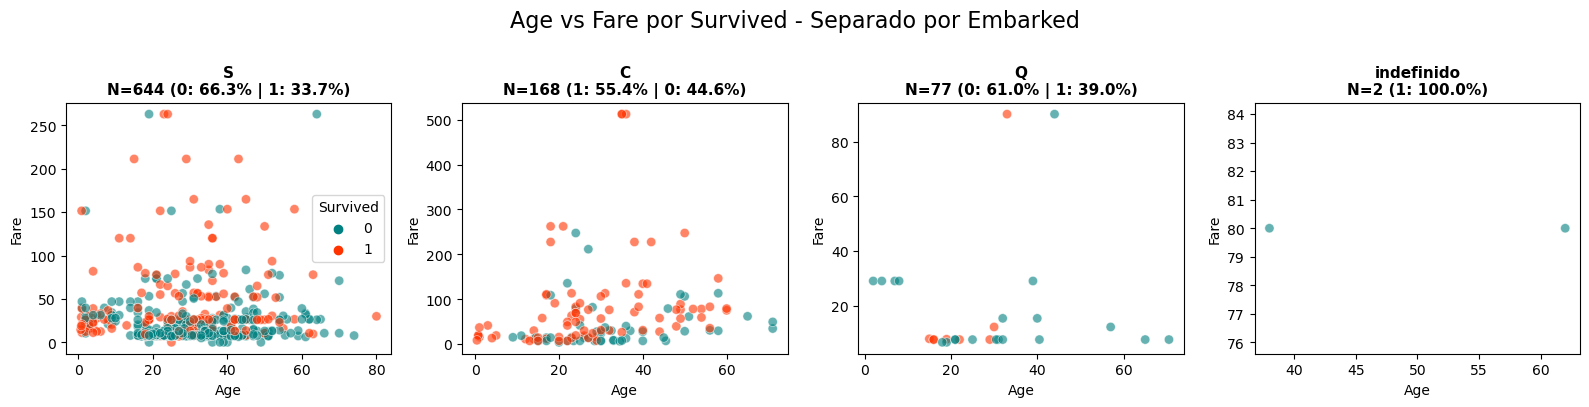

In [27]:
out1=scatter_by_category(df,'Age','Fare',
    hue_var='Survived',
    category_var='Embarked',
    ncols=4)

In [11]:
# corr = df[['Survived','Age','Fare','FamilySize','Pclass']].corr()

# px.imshow(
#     corr,
#     text_auto=True,
#     title='Matriz de Correlação'
# )


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         714 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float64 
 9   Cabin       204 non-null    object  
 10  Embarked    889 non-null    object  
 11  HasCabin    891 non-null    int64   
 12  Age_Group   714 non-null    category
 13  FamilySize  891 non-null    int64   
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 91.7+ KB
